In [ ]:
!pip install git+https://github.com/AlertaDengue/PySUS.git --upgrade


In [1]:
# Usando a interface do Google Colab, reinicie o ambiente:
# PT: Tempo de execução → Reiniciar ambiente
# EN: Runtime → Restart runtime


In [12]:
# Listar todos os códigos de doenças disponíveis para SINAN
import pandas as pd
from pysus.online_data.SINAN import SINAN

# Instancia o objeto SINAN
sinan = SINAN()

# Lista de códigos válidos
codigos = sorted(sinan.diseases)

# Mapeamento deduzido de descrições
descricoes = {
    'ACBI': 'Acidente com animais - abelhas/insetos',
    'ACGR': 'Acidente com animais - grupo geral',
    'ANIM': 'Acidente com animais peçonhentos',
    'ANTR': 'Antraz',
    'BOTU': 'Botulismo',
    'CANC': 'Câncer relacionado a notificação',
    'CHAG': 'Doença de Chagas',
    'CHIK': 'Chikungunya',
    'COLE': 'Cólera',
    'COQU': 'Coqueluche',
    'DENG': 'Dengue',
    'DERM': 'Dermatite ou doença de pele relacionada',
    'DIFT': 'Difteria',
    'ESQU': 'Esquistossomose',
    'EXAN': 'Exantema súbito / doenças eruptivas',
    'FMAC': 'Febre maculosa',
    'FTIF': 'Febre tifóide',
    'HANS': 'Hanseníase',
    'HANT': 'Hantavirose',
    'HEPA': 'Hepatite A/B/C',
    'IEXO': 'Infecção exógena (deduzido)',
    'INFL': 'Influenza (Gripe)',
    'LEIV': 'Leishmaniose visceral',
    'LEPT': 'Leptospirose',
    'LERD': 'Lesões por esforço repetitivo / doenças relacionadas ao trabalho',
    'LTAN': 'Leishmaniose tegumentar americana',
    'MALA': 'Malária',
    'MENI': 'Meningite',
    'MENT': 'Doenças mentais relacionadas a notificação',
    'NTRA': 'Notificações não traduzidas (deduzido)',
    'PAIR': 'Paralisia infantil (Poliomielite)',
    'PEST': 'Peste',
    'PFAN': 'Febre amarela',
    'PNEU': 'Pneumonia',
    'RAIV': 'Raiva humana',
    'SDTA': 'Síndrome do desconforto respiratório agudo grave',
    'SIFA': 'Sífilis adquirida',
    'SIFC': 'Sífilis congênita',
    'SIFG': 'Sífilis em gestantes',
    'SRC': 'Síndrome da rubéola congênita',
    'TETA': 'Tétano acidental',
    'TETN': 'Tétano neonatal',
    'TOXC': 'Intoxicação por contato químico',
    'TOXG': 'Toxoplasmose gestacional',
    'TRAC': 'Tracoma',
    'TUBE': 'Tuberculose',
    'VARC': 'Varicela (Catapora)',
    'VIOL': 'Violência interpessoal/autoprovocada',
    'ZIKA': 'Zika vírus'
}

# Criar DataFrame com base nos mapeamentos
df_codigos = pd.DataFrame({
    'Código': codigos,
    'Descrição (deduzida)': [descricoes.get(codigo, 'Descrição não disponível') for codigo in codigos]
})

print("Lista dos primeiros 50 códigos de doenças disponíveis para pesquisa no SINAN:")
# Visualizar como tabela
df_codigos.head(50)  # Mostra os primeiros 50, ou use display(df_codigos) se estiver no Colab


Lista dos primeiros 50 códigos de doenças disponíveis para pesquisa no SINAN:


,Código,Descrição (deduzida)
0,ACBI,Acidente com animais - abelhas/insetos
1,ACGR,Acidente com animais - grupo geral
2,ANIM,Acidente com animais peçonhentos
3,ANTR,Antraz
4,BOTU,Botulismo
5,CANC,Câncer relacionado a notificação
6,CHAG,Doença de Chagas
7,CHIK,Chikungunya
8,COLE,Cólera
9,COQU,Coqueluche


In [13]:
# Lista as colunas disponíveis para pesquisa no SINAN (para o código "DENG")
# 1. Importações
import pandas as pd
from pysus.online_data.SINAN import download

# 2. Download da base de DENGUE (código 'DENG') no ano de 2020
# Retorno é um objeto ParquetSet
dados = download("DENG", 2020)

# 3. Converte para DataFrame
df = dados.to_dataframe()

# 4. Verificação da dimensão do DataFrame
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")

print("Lista de colunas disponíveis para pesquisa no SINAN:")

# 5. Visualização das colunas disponíveis
df.columns.tolist()



73846449it [00:00, 41024431314.77it/s]


Número de linhas: 1495117
Número de colunas: 119
Lista de colunas disponíveis para pesquisa no SINAN:


['TP_NOT',
 'ID_AGRAVO',
 'DT_NOTIFIC',
 'SEM_NOT',
 'NU_ANO',
 'SG_UF_NOT',
 'ID_MUNICIP',
 'ID_REGIONA',
 'ID_UNIDADE',
 'DT_SIN_PRI',
 'SEM_PRI',
 'DT_NASC',
 'NU_IDADE_N',
 'CS_SEXO',
 'CS_GESTANT',
 'CS_RACA',
 'CS_ESCOL_N',
 'SG_UF',
 'ID_MN_RESI',
 'ID_RG_RESI',
 'ID_PAIS',
 'DT_INVEST',
 'ID_OCUPA_N',
 'FEBRE',
 'MIALGIA',
 'CEFALEIA',
 'EXANTEMA',
 'VOMITO',
 'NAUSEA',
 'DOR_COSTAS',
 'CONJUNTVIT',
 'ARTRITE',
 'ARTRALGIA',
 'PETEQUIA_N',
 'LEUCOPENIA',
 'LACO',
 'DOR_RETRO',
 'DIABETES',
 'HEMATOLOG',
 'HEPATOPAT',
 'RENAL',
 'HIPERTENSA',
 'ACIDO_PEPT',
 'AUTO_IMUNE',
 'DT_CHIK_S1',
 'DT_CHIK_S2',
 'DT_PRNT',
 'RES_CHIKS1',
 'RES_CHIKS2',
 'RESUL_PRNT',
 'DT_SORO',
 'RESUL_SORO',
 'DT_NS1',
 'RESUL_NS1',
 'DT_VIRAL',
 'RESUL_VI_N',
 'DT_PCR',
 'RESUL_PCR_',
 'SOROTIPO',
 'HISTOPA_N',
 'IMUNOH_N',
 'HOSPITALIZ',
 'DT_INTERNA',
 'UF',
 'MUNICIPIO',
 'TPAUTOCTO',
 'COUFINF',
 'COPAISINF',
 'COMUNINF',
 'CLASSI_FIN',
 'CRITERIO',
 'DOENCA_TRA',
 'CLINC_CHIK',
 'EVOLUCAO',
 'DT_O

In [14]:
# 1. Importações
import pandas as pd
from pysus.online_data.SINAN import download

# 2. Download da base de DENGUE (2020)
dados = download("DENG", 2020)

# 3. Conversão para DataFrame
df = dados.to_dataframe()

# 4. Visualização básica
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")

# 5. Primeiras linhas
df.head()


73846449it [00:00, 49828580506.19it/s]


Número de linhas: 1495117
Número de colunas: 119


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,LACO_N,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,CS_FLXRET,FLXRECEBI
0,2,A90,2020-10-05,,2020,35,354780,1332,2079607,2020-10-02,...,,,,,,,2,,1,
1,2,A90,2020-11-17,,2020,35,355220,1353,2062054,2020-11-14,...,,,,,,,2,,0,
2,2,A90,2020-11-18,,2020,35,355220,1353,2062054,2020-11-17,...,,,,,,,2,,0,
3,2,A90,2020-11-18,,2020,35,355220,1353,2708566,2020-11-12,...,,,,,,,2,,0,
4,2,A90,2020-11-19,,2020,35,355220,1353,2708566,2020-11-18,...,,,,,,,2,,1,


In [16]:
# 7. Análise exploratória: evolução dos casos ao longo do tempo

# Converte data de notificação
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], errors='coerce')

# Agrupa por mês de notificação
casos_mensais = df['DT_NOTIFIC'].dt.to_period('M').value_counts().sort_index()

# Converte para DataFrame
casos_mensais = casos_mensais.rename_axis('Mes').reset_index(name='Casos')

# Exibe
casos_mensais


,Mes,Casos
0,2019-12,5653
1,2020-01,160613
2,2020-02,289466
3,2020-03,312584
4,2020-04,229339
5,2020-05,166284
6,2020-06,107474
7,2020-07,68205
8,2020-08,36125
9,2020-09,29463


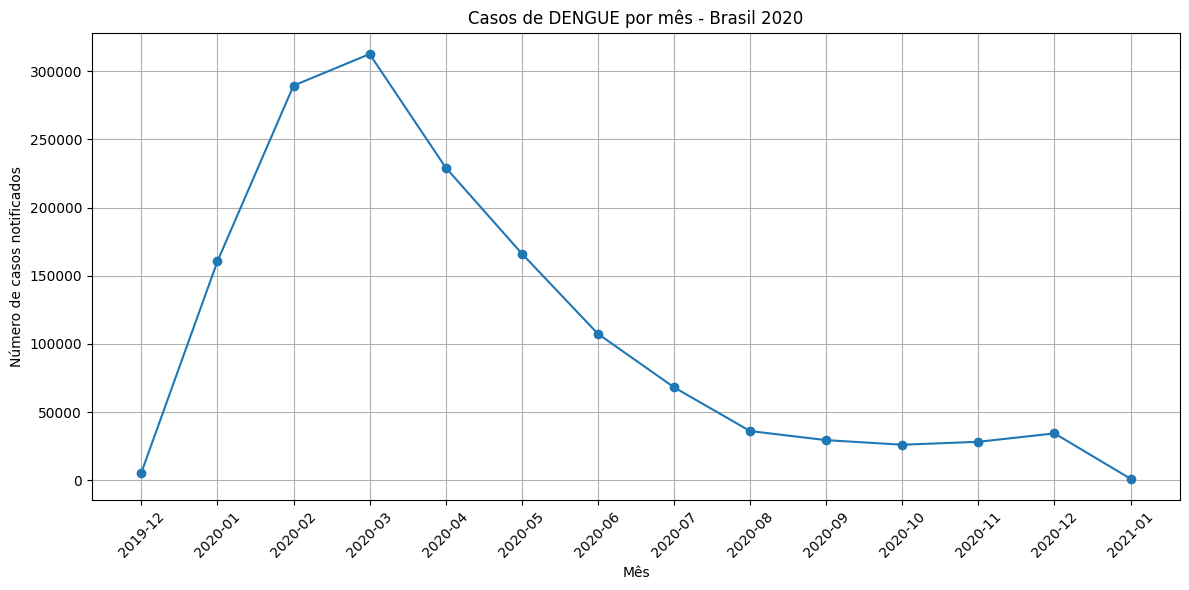

In [17]:
# 8. Visualização em gráfico de linha
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(casos_mensais['Mes'].astype(str), casos_mensais['Casos'], marker='o')
plt.xticks(rotation=45)
plt.title("Casos de DENGUE por mês - Brasil 2020")
plt.xlabel("Mês")
plt.ylabel("Número de casos notificados")
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
# 9. Distribuição por sexo
df['CS_SEXO'].value_counts(dropna=False)


,count
CS_SEXO,
F,820704
M,673007
I,1400
,6


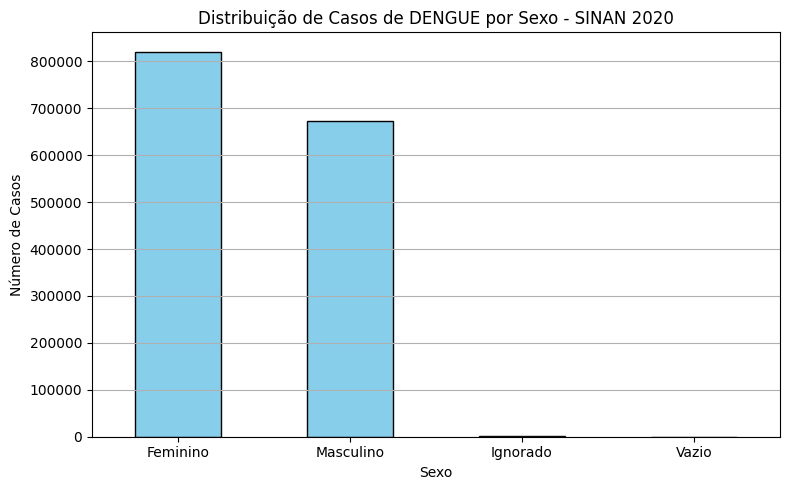

In [20]:
# 1. Contagem por sexo (incluindo valores ausentes)
sexo_counts = df['CS_SEXO'].value_counts(dropna=False)

# 2. Renomear os códigos se desejar (opcional)
sexo_labels = {
    'M': 'Masculino',
    'F': 'Feminino',
    'I': 'Ignorado',
    '': 'Vazio',
    pd.NA: 'Não informado',
    None: 'Não informado'
}

# 3. Substitui os rótulos
sexo_counts.index = [sexo_labels.get(s, str(s)) for s in sexo_counts.index]

# 4. Gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sexo_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribuição de Casos de DENGUE por Sexo - SINAN 2020")
plt.xlabel("Sexo")
plt.ylabel("Número de Casos")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [19]:
# 10. Distribuição por faixa etária aproximada

# Criar faixas etárias com base em 'NU_IDADE_N' (idade em anos presumida)
df['NU_IDADE_N'] = pd.to_numeric(df['NU_IDADE_N'], errors='coerce')

faixas = pd.cut(
    df['NU_IDADE_N'],
    bins=[0, 5, 14, 24, 34, 44, 59, 74, 120],
    labels=['0-4', '5-14', '15-24', '25-34', '35-44', '45-59', '60-74', '75+']
)

faixas.value_counts().sort_index()


,count
NU_IDADE_N,
0-4,7
5-14,11
15-24,27
25-34,26
35-44,25
45-59,28
60-74,14
75+,5


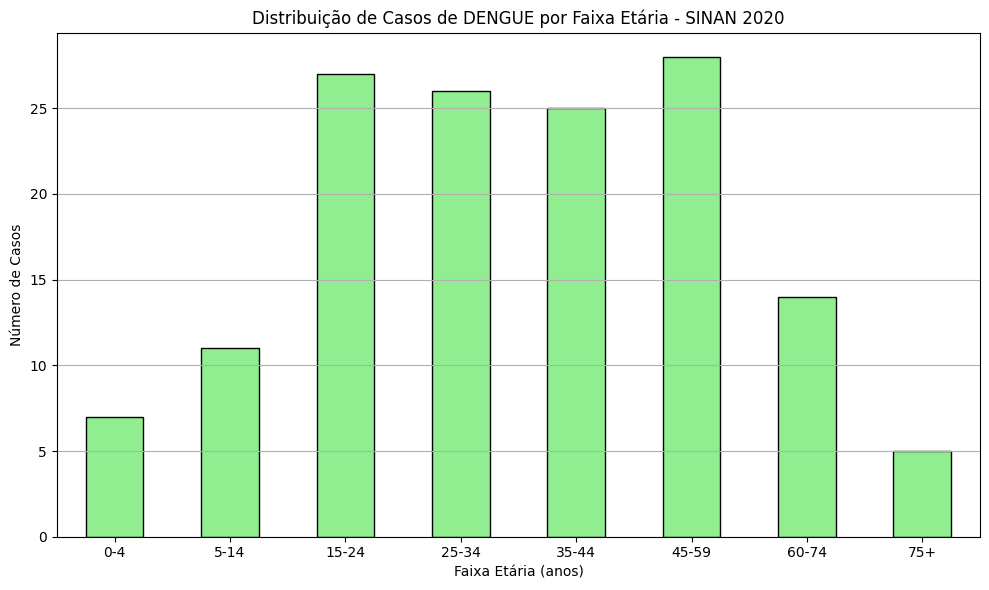

In [21]:
# 1. Converter NU_IDADE_N para numérico
df['NU_IDADE_N'] = pd.to_numeric(df['NU_IDADE_N'], errors='coerce')

# 2. Definir faixas etárias
faixas = pd.cut(
    df['NU_IDADE_N'],
    bins=[0, 5, 14, 24, 34, 44, 59, 74, 120],
    labels=['0-4', '5-14', '15-24', '25-34', '35-44', '45-59', '60-74', '75+']
)

# 3. Contagem por faixa
faixa_counts = faixas.value_counts().sort_index()

# 4. Gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
faixa_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Distribuição de Casos de DENGUE por Faixa Etária - SINAN 2020")
plt.xlabel("Faixa Etária (anos)")
plt.ylabel("Número de Casos")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
